In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer
from sklearn.impute import SimpleImputer     # WORK OF DATA HANDLING (NULL VALUES) 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
df = pd.read_csv(r'WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [3]:
print(df.shape)

(1470, 35)


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [5]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [6]:
print("Unique values in 'Attrition' before cleaning:", df['Attrition'].unique())
# Clean the 'Attrition' column

Unique values in 'Attrition' before cleaning: ['Yes' 'No']


In [7]:
df['Attrition'] = df['Attrition'].astype(str).str.strip().str.capitalize()

print("Unique values in 'Attrition' after cleaning:", df['Attrition'].unique())

Unique values in 'Attrition' after cleaning: ['Yes' 'No']


Rows after filtering valid Attrition : 1470


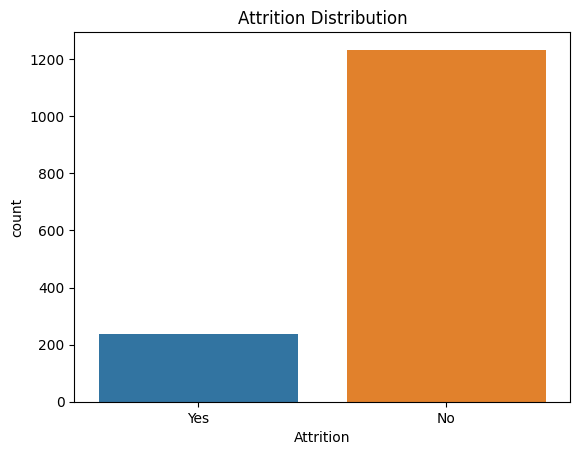

In [8]:
df_clean = df[df['Attrition'].isin(['Yes', 'No'])].copy()
print(f"Rows after filtering valid Attrition : {len(df_clean)}")

# optional : visulize target distribution
sns.countplot(x='Attrition', data=df_clean)
plt.title('Attrition Distribution')
plt.show()

In [9]:
y = df_clean["Attrition"].map({'Yes': 1, 'No': 0})
x = df_clean.drop(columns = ["Attrition"])

In [10]:
df_clean.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [11]:
drop_cols= ['EmployeeCount', 'Over18', 'StandardHours', 'EmployeeNumber']

categorical_cols = ['BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus']

numerical_cols = [

'Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 
'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating',
'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears',
'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
'YearsSinceLastPromotion', 'YearsWithCurrManager']

In [12]:
def binary_cleanup(data):
    data = data.copy()
    data['Gender'] = data['Gender'].map({'Male':1, 'Female':0})
    data['OverTime'] = data['OverTime'].map({'Yes':1, 'No':0})
    return data.drop(columns = drop_cols)

binary_transformaer = FunctionTransformer(binary_cleanup)

In [13]:
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(drop = 'first'))
])


preprocessor = ColumnTransformer([
    ('num', num_pipeline, numerical_cols),
    ('cat', cat_pipeline, categorical_cols)],
    remainder = 'passthrough' ) 



In [14]:
full_pipeline = Pipeline([
    ('cleanup', binary_transformaer),
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))])

In [15]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42, stratify=y)

In [16]:
full_pipeline.fit(x_train, y_train)

c:\Users\Varsha\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\compose\_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('cleanup',
                 FunctionTransformer(func=<function binary_cleanup at 0x00000294A81663B0>)),
                ('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'DailyRate',
                                                   'DistanceFromHome',
                                                   'Education',
                                                   'EnvironmentSatisfaction',
                                                   'Hour...
                                                   'WorkLifeBalance',
                                                   'YearsAtCompany',
                                                   'YearsInCurrentRole',
                                                   'YearsSinceLastPromotion',
                                                   'YearsWithCurrManager']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['BusinessTravel',
                                                   'Department',
                                                   'EducationField', 'JobRole',
                                                   'MaritalStatus'])])),
                ('classifier', LogisticRegression(max_iter=1000))])

In [17]:
y_pred = full_pipeline.predict(x_test)

In [18]:
print("\n Accuracy:", accuracy_score(y_test, y_pred))
print("\n Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n Classification Report:\n", classification_report(y_test, y_pred))
# Optional: Visualize the confusion matrix


 Accuracy: 0.8639455782312925

 Confusion Matrix:
 [[238   9]
 [ 31  16]]

 Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92       247
           1       0.64      0.34      0.44        47

    accuracy                           0.86       294
   macro avg       0.76      0.65      0.68       294
weighted avg       0.85      0.86      0.85       294



In [19]:
import joblib

#  save the trained pipeline to a joblib file
joblib.dump(full_pipeline, 'attrition_model.joblib')

print ("Model saved to attrition_model.joblib")

Model saved to attrition_model.joblib


In [20]:
import joblib
import pandas as pd

# Load the trained pipeline
model = joblib.load("attrition_model.joblib")

# Create a sample input matching the original training feature columns
sample = pd.DataFrame([{
    'Age': 35,
    'DailyRate': 800,
    'DistanceFromHome': 10,
    'Education': 3,
    'EnvironmentSatisfaction': 3,
    'Gender': 'Male',
    'HourlyRate': 60,
    'JobInvolvement': 3,
    'JobLevel': 2,
    'JobSatisfaction': 3,
    'MonthlyIncome': 5000,
    'MonthlyRate': 15000,
    'NumCompaniesWorked': 2,
    'OverTime': 'Yes',
    'PercentSalaryHike': 15,
    'PerformanceRating': 3,
    'RelationshipSatisfaction': 3,
    'StockOptionLevel': 1,
    'TotalWorkingYears': 8,
    'TrainingTimesLastYear': 3,
    'WorkLifeBalance': 3,
    'YearsAtCompany': 4,
    'YearsInCurrentRole': 2,
    'YearsSinceLastPromotion': 1,
    'YearsWithCurrManager': 2,
    'BusinessTravel': 'Travel_Rarely',
    'Department': 'Research & Development',
    'EducationField': 'Life Sciences',
    'JobRole': 'Research Scientist',
    'MaritalStatus': 'Single',
    'EmployeeCount': 1,
    'Over18': 'Y',
    'StandardHours': 80,
    'EmployeeNumber': 12345
}])

prediction = model.predict(sample)[0]
print(prediction)
label = "Yes (Will Leave)" if prediction == 1 else "No (Will Stay)"
print("Prediction:", label)

0
Prediction: No (Will Stay)
